In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
from statsmodels.stats.descriptivestats import describe
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('../data/Heart Disease/heart_2020_cleaned.csv')

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
describe(df)

,BMI,PhysicalHealth,MentalHealth,SleepTime
nobs,319795.000000,319795.000000,319795.000000,319795.000000
missing,0.000000,0.000000,0.000000,0.000000
mean,28.325399,3.371710,3.898366,7.097075
std_err,0.000020,0.000025,0.000025,0.000004
upper_ci,28.325437,3.371759,3.898415,7.097083
lower_ci,28.325360,3.371661,3.898317,7.097066
std,6.356100,7.950850,7.955235,1.436007
iqr,7.390000,2.000000,3.000000,2.000000
iqr_normal,5.478215,1.482602,2.223903,1.482602
mad,4.778337,5.081276,5.430810,1.016007


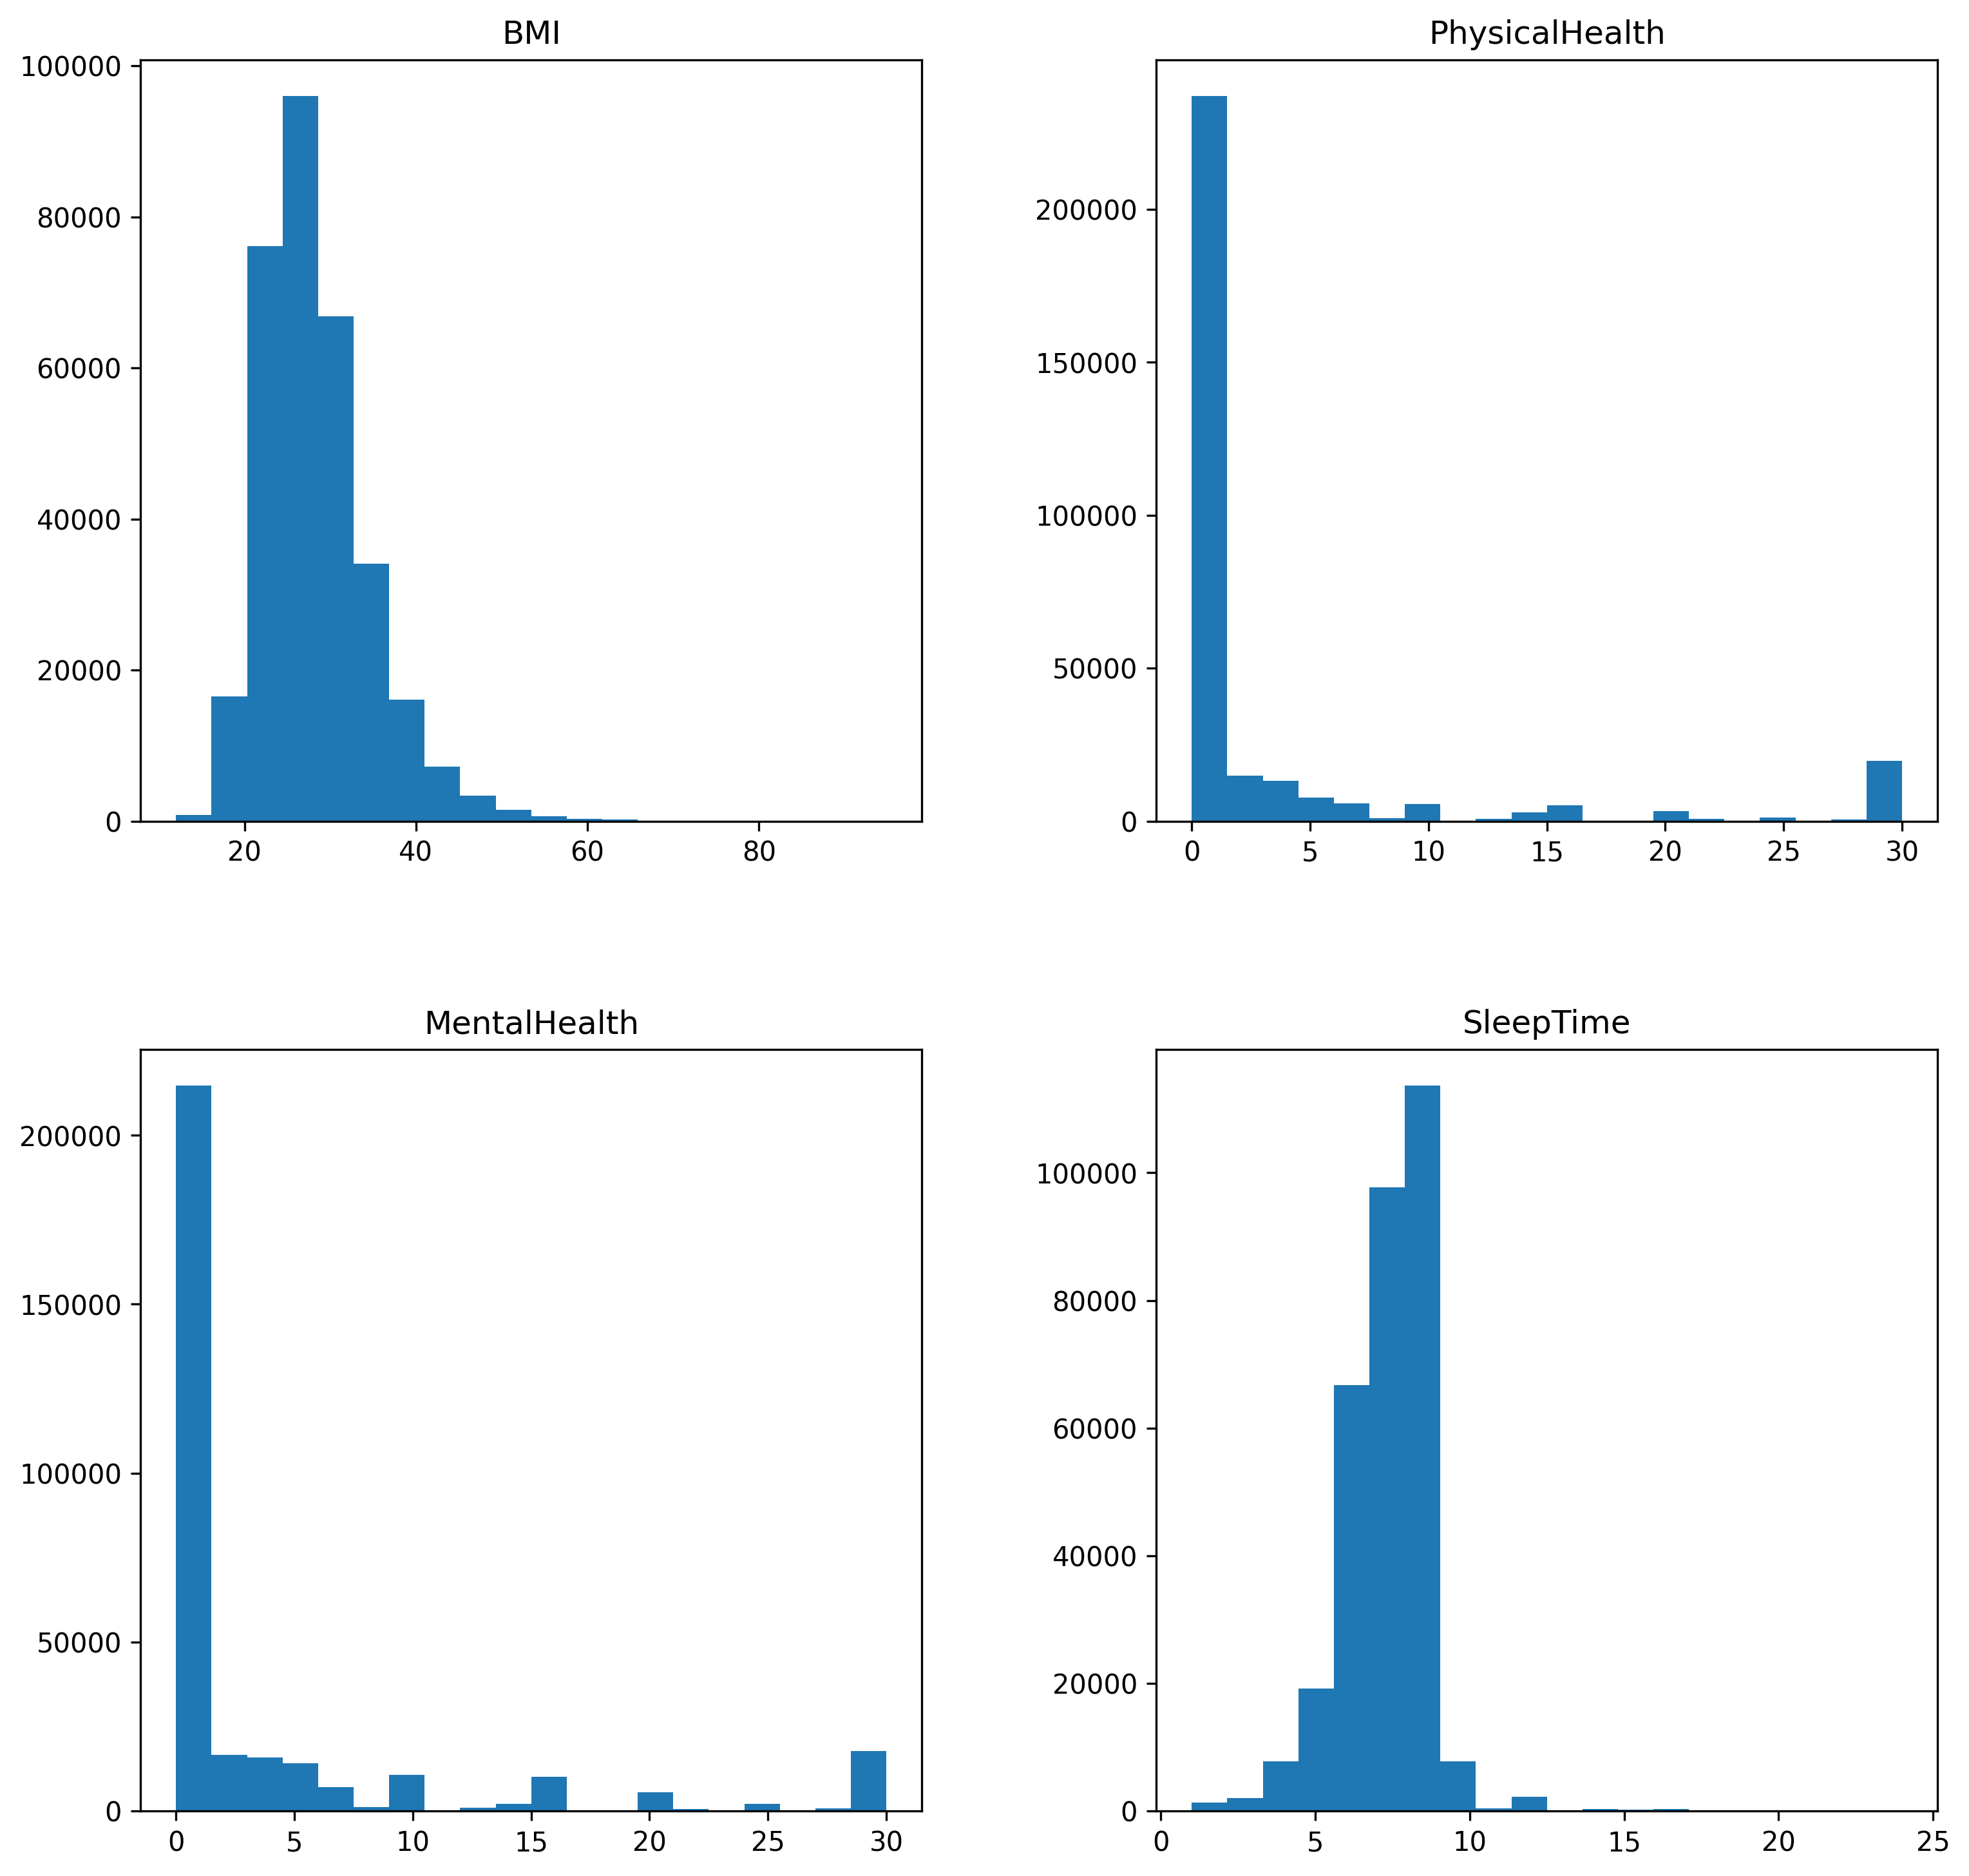

In [5]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

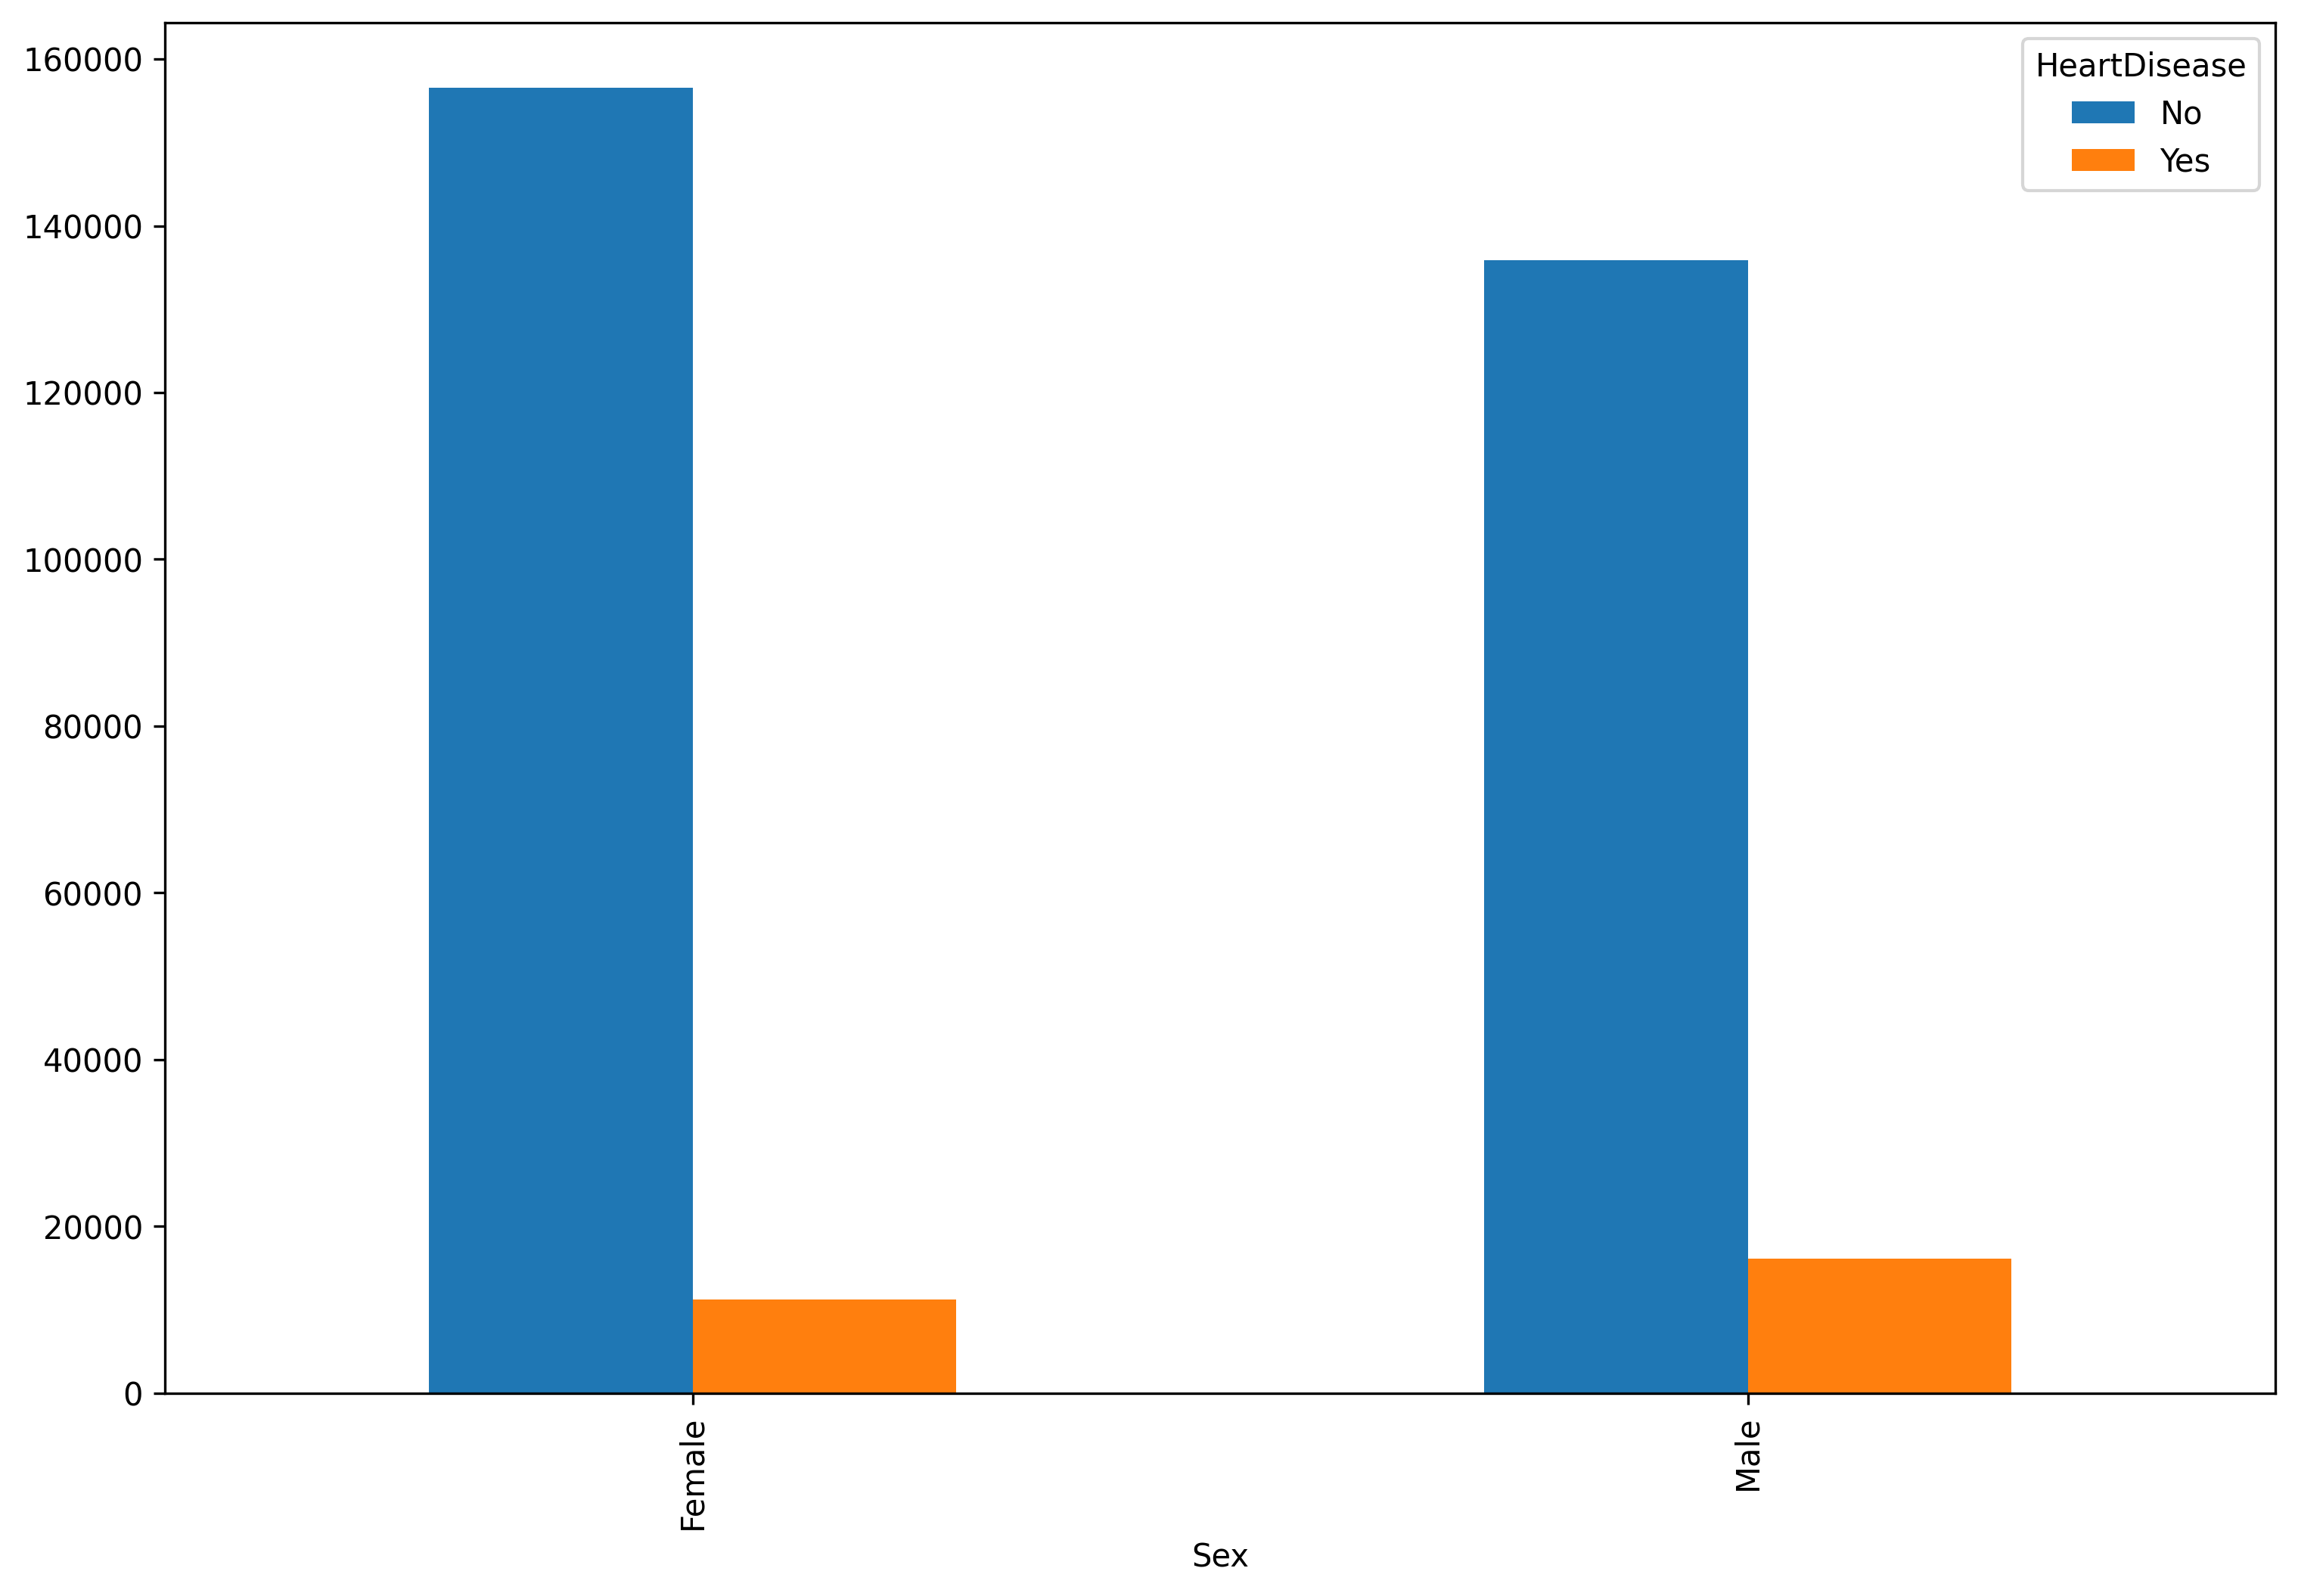

In [54]:
df_cont = pd.crosstab(df['Sex'], df['HeartDisease'])
df_cont.plot(figsize = (12,8), kind = 'bar')

plt.show()

In [55]:
exp, obs, stats = pg.chi2_independence(df, 'Sex', 'HeartDisease')

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1568.306917,1.0,0.0,0.070029,1.0
1,cressie-read,0.666667,1567.518069,1.0,0.0,0.070012,1.0
2,log-likelihood,0.000000,1570.144258,1.0,0.0,0.070070,1.0
3,freeman-tukey,-0.500000,1575.828016,1.0,0.0,0.070197,1.0
4,mod-log-likelihood,-1.000000,1584.748426,1.0,0.0,0.070395,1.0
5,neyman,-2.000000,1612.585428,1.0,0.0,0.071011,1.0


In [57]:
dv = 'BMI'
group = 'Race'

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group)

plt.show()

In [59]:
pg.normality(df, dv = dv, group = group, method = 'jarque_bera')

,W,pval,normal
White,183702.651131,0.0,False
Black,15480.016756,0.0,False
Asian,36779.366211,0.0,False
American Indian/Alaskan Native,4159.485677,0.0,False
Other,19600.678806,0.0,False
Hispanic,51281.365789,0.0,False


In [60]:
pg.kruskal(df, dv = dv, between = group, detailed = True)

,Source,ddof1,H,p-unc
Kruskal,Race,5,4688.961224,0.0
